<a href="https://colab.research.google.com/github/Cole-Pd/DeepDive/blob/main/project_6_draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [ ]:
import pickle
import pandas as pd
import tensorflow.keras as keras
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
import imageio.v2 as img


* Load pickled data from X.pickle and y.pickle from the AWS S3 bucket.



In [ ]:
# Feature set of Dogs and Cats
x_pickle = '/content/X.pickle'
train_set = pickle.load( open(x_pickle,'rb'))

In [ ]:
# Target set of Dogs and Cats
y_pickle = '/content/y.pickle'
target_set = pickle.load( open(y_pickle,'rb'))

## Data Cleaning



* Scale the values in X so that they fall between 0 and 1 by dividing by 255.



In [ ]:
train_set = (train_set)/255

In [ ]:
group = []
for i in range(len(train_set)):
  group.append(train_set[i].shape)

In [ ]:
pd.Series(group).value_counts()

(100, 100, 1)    24946
dtype: int64

## Exploratory Data Analysis


* Look at the shape of X and y. Ensure that X is 4 dimensional.

In [ ]:
train_set.shape

(24946, 100, 100, 1)

In [ ]:
train_set[0].shape

(100, 100, 1)

In [ ]:
target_set = np.array(target_set)

In [ ]:
type(train_set)

numpy.ndarray

* Plot one of the images in X using plt.imshow().


In [ ]:
# plt.imshow(train_set[38], 'Greys') ;

* Look at the response value in y for that image.

In [ ]:
target_set[341] # values of 1 are cat(s) values of 0 are dog(s).

1

## Processing


* Split X and y into training and testing sets.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(train_set, target_set, test_size = .2)

*  Build a neural network:

In [ ]:
model = Sequential()

In [ ]:
# Add Convolutional and MaxPooling layers.
model.add(
  Conv2D(
    name = "Layer_1",
    input_shape = xtrain.shape[1:],
    filters = 30,
    kernel_size = (3,3),
    activation = 'relu', #Relu is linear.
  )
)
model.add(
    MaxPooling2D(pool_size=(2,2))
)

model.add(
  Conv2D(
    name = "Layer_2",
    input_shape = xtrain.shape[1:],
    filters = 30,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)

model.add(
  Conv2D(
    name = "Layer_3",
    input_shape = xtrain.shape[1:],
    filters = 30,
    kernel_size = (3,3),
    activation = 'relu',
  )
)

model.add(
    MaxPooling2D(pool_size=(2,2))
)


In [ ]:
# Flatten and add a Dense Layer
model.add(
    Flatten()
)

model.add(
  Dense(
    name = 'binary',
    units = 1,
    activation = 'sigmoid' #Sigmoid is binary
  )
)

In [ ]:
# Compile model
model.compile(
  optimizer = 'adam',
  loss = 'binary_crossentropy',
  metrics = ['accuracy'],
)

* Fit your model using the training set.

In [ ]:
model.fit(xtrain, ytrain, epochs = 15)

Epoch 1/15
624/624 [==============================] - 6s 9ms/step - loss: 0.6293 - accuracy: 0.6393
Epoch 2/15
624/624 [==============================] - 5s 8ms/step - loss: 0.5258 - accuracy: 0.7377
Epoch 3/15
624/624 [==============================] - 5s 8ms/step - loss: 0.4590 - accuracy: 0.7853
Epoch 4/15
624/624 [==============================] - 5s 9ms/step - loss: 0.4264 - accuracy: 0.8053
Epoch 5/15
624/624 [==============================] - 5s 8ms/step - loss: 0.3988 - accuracy: 0.8191
Epoch 6/15
624/624 [==============================] - 6s 9ms/step - loss: 0.3763 - accuracy: 0.8325
Epoch 7/15
624/624 [==============================] - 5s 8ms/step - loss: 0.3489 - accuracy: 0.8457
Epoch 8/15
624/624 [==============================] - 5s 8ms/step - loss: 0.3311 - accuracy: 0.8552
Epoch 9/15
624/624 [==============================] - 5s 9ms/step - loss: 0.3107 - accuracy: 0.8680
Epoch 10/15
624/624 [==============================] - 6s 10ms/step - loss: 0.2981 - accuracy: 0.873

156/156 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8501
85.01%


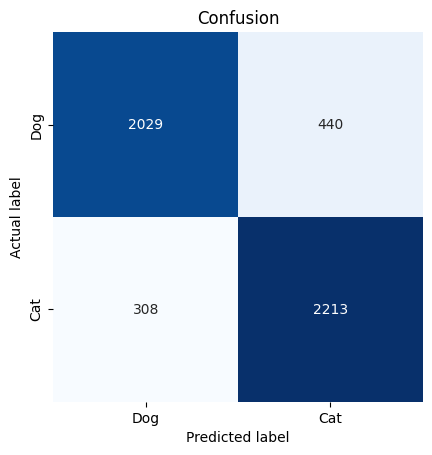

In [ ]:
from sklearn.metrics import confusion_matrix

ypredicted = model.predict(xtest) > 0.5
matrix = confusion_matrix(ytest, ypredicted)
labels = ['Dog', 'Cat']

sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label') ;
plt.ylabel('Actual label') ;
plt.title('Confusion') ;

loss, accuracy = model.evaluate(xtest, ytest)
print(f'{round(accuracy*100,2)}%')

## Data Visualization/Communication of Results


In [ ]:
from PIL import Image
from numpy import asarray

array([[[170,  87,  33],
        [169,  86,  32],
        [169,  86,  32],
        ...,
        [215, 141,  52],
        [214, 143,  53],
        [215, 144,  54]],

       [[168,  85,  31],
        [167,  84,  30],
        [167,  84,  30],
        ...,
        [215, 141,  52],
        [215, 144,  54],
        [216, 145,  55]],

       [[166,  83,  29],
        [166,  83,  29],
        [165,  82,  28],
        ...,
        [217, 143,  54],
        [216, 145,  55],
        [216, 145,  55]],

       ...,

       [[104, 115, 137],
        [ 96, 107, 129],
        [ 96, 106, 131],
        ...,
        [255, 225, 187],
        [255, 225, 187],
        [255, 224, 186]],

       [[ 97, 108, 130],
        [102, 113, 135],
        [102, 112, 137],
        ...,
        [254, 226, 187],
        [255, 225, 187],
        [255, 224, 186]],

       [[ 98, 109, 131],
        [102, 113, 135],
        [101, 111, 136],
        ...,
        [254, 226, 187],
        [255, 225, 187],
        [255, 224, 186]]], dtype=uint8)
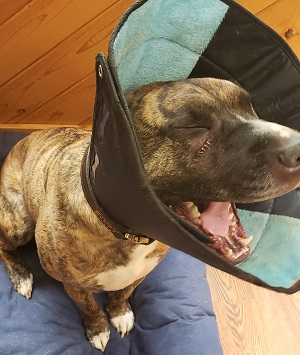

In [ ]:
good_cone_boy = img.imread('https://ddc-datascience.s3.amazonaws.com/Projects/Project.6-Images/Data/dog.jpg')
good_cone_boy

In [ ]:
transform_gcb = np.array(Image.fromarray(good_cone_boy).convert('L').resize([100,100]))
transform_gcb.shape

(100, 100)

In [ ]:
transform_gcb = transform_gcb.reshape((1,) + transform_gcb.shape)
transform_gcb.shape

(1, 100, 100)

In [ ]:
our_prediction = model.predict(transform_gcb)

1/1 [==============================] - 0s 17ms/step


In [ ]:
int(our_prediction)

<ipython-input-118-15677a5cc073>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(our_prediction)


1